In [24]:
import numpy as np
from scipy.integrate import quad, solve_ivp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import leastsq, curve_fit, minimize_scalar, optimize

In [4]:
a = 0.5
b = 0.3
N = 1000000
S_0 = 990000
I_0 = 7000
R_0 = 3000
t_0, t_f = 0, 25

In [3]:
def func_s(t, S):
    return (-(a * S))

In [6]:
solution_s = solve_ivp(func_s, (t_0, t_f), [S_0], dense_output=True)
print(solution_s)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.149e-01 ...  2.415e+01  2.500e+01]
        y: [[ 9.900e+05  9.347e+05 ...  5.677e+00  3.713e+00]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f31c1a01d30>
 t_events: None
 y_events: None
     nfev: 98
     njev: 0
      nlu: 0


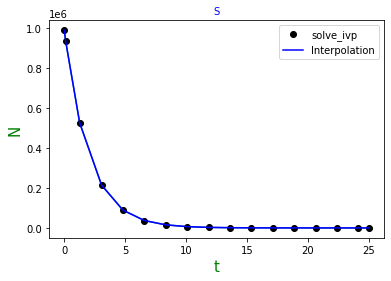

In [8]:
t_dsdt, y_dsdt = solution_s.t, solution_s.y[0]

plt.plot(t_dsdt, y_dsdt)
z_dsdt, = solution_s.sol(t_dsdt)
plt.plot(t_dsdt, y_dsdt, 'o', color='k', label='solve_ivp')

plt.plot(t_dsdt, z_dsdt, color='blue', label='Interpolation')
plt.title('S', fontsize=10, color='blue')
plt.xlabel('t', fontsize=15, color="g") 
plt.ylabel('N', fontsize=15, color="g") 
plt.legend()

plt.show()

In [11]:
def dIdt(t, I):
    return ((a * solution_s.sol(t)) - (b * I))

In [14]:
solution_i = solve_ivp(dIdt, (t_0, t_f), [I_0], dense_output=True)
print(solution_i)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.420e-02 ...  2.360e+01  2.500e+01]
        y: [[ 7.000e+03  1.396e+04 ...  2.075e+03  1.368e+03]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f31bec7cdc0>
 t_events: None
 y_events: None
     nfev: 80
     njev: 0
      nlu: 0


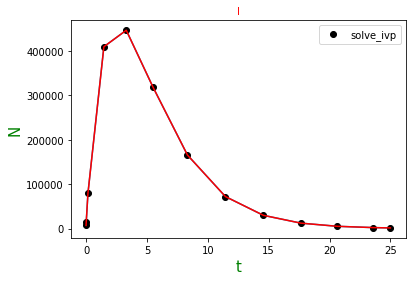

In [20]:
t_didt, y_didt = solution_i.t, solution_i.y[0]

plt.plot(t_didt, y_didt)
z_didt, = solution_i.sol(t_didt)
plt.plot(t_didt, y_didt, 'o', color='k', label='solve_ivp')
plt.plot(t_didt, z_didt, color='red')
plt.title('I', fontsize=10, color='red')
plt.xlabel('t', fontsize=15, color="g") 
plt.ylabel('N', fontsize=15, color="g") 
plt.legend()
plt.show()

In [17]:
R_0 = N - solution_s.sol(solution_i.t)[0] - solution_i.y[0]
interp_r = interp1d(solution_i.t, R_0, kind='linear')

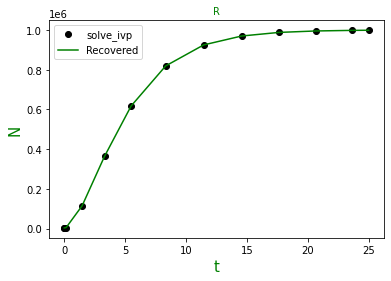

In [21]:
plt.plot(solution_i.t, R_0, 'o', color='k', label='solve_ivp')
plt.plot(solution_i.t, interp_r(solution_i.t), color='green', label='Recovered')

plt.title('R', fontsize=10, color='green')
plt.xlabel('t', fontsize=15, color='g')
plt.ylabel('N', fontsize=15, color='g') 
plt.legend()
plt.show()

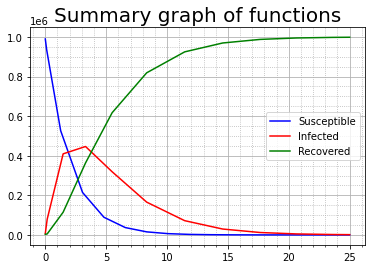

In [22]:
plt.plot(t_dsdt, y_dsdt, color='blue', label='Susceptible')
plt.plot(t_didt, y_didt, color='red', label='Infected')
plt.plot(solution_i.t, R_0, color='green', label='Recovered')

plt.title('Summary graph of functions', fontsize=20, color='k')
plt.legend()
plt.grid(which='major')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':');
plt.show()

Во второй части прошлого домашнего задания мы решали дифференциальные уравнения и строили графики. Продолжаем работать над этой домашней работой дальше.

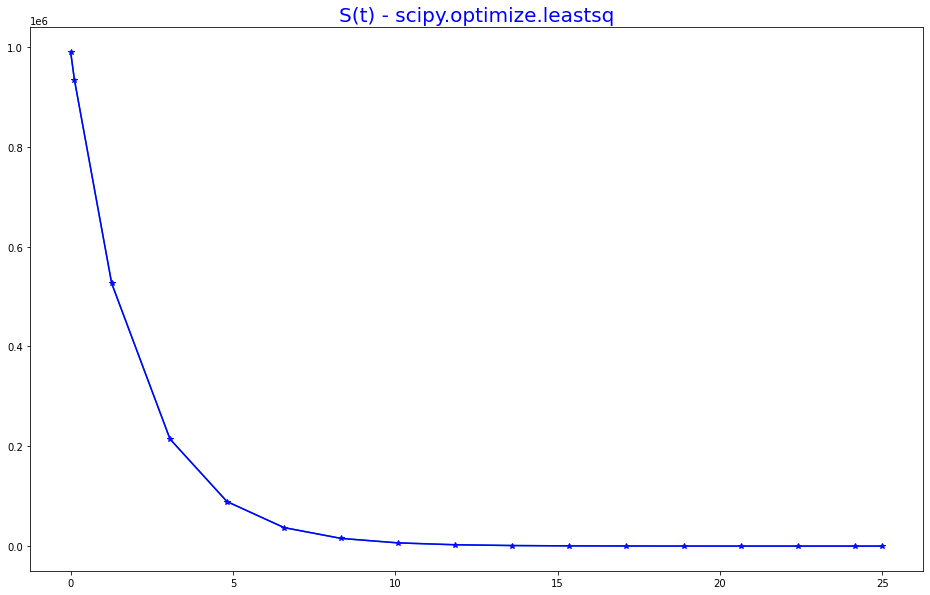

In [26]:
res, res1 = solution_s.t, solution_s.y[0]
     

def function_s(res, S, I):
    return S * np.exp(-a * res)
     

def diff_s(p_s, res, res1):
    S, A = p_s
    return res1 - function_s(res, S, I_0)
     

p0 = (S_0, a)
aprx_s, _ = leastsq(diff_s, p0, args=(res, res1))
     

plt.plot(res, res1, 'b*')
plt.plot(res, function_s(res, aprx_s[0], aprx_s[1]))
plt.plot(res, res1, color='blue')
plt.title('S(t) - scipy.optimize.leastsq', fontsize=20, color='blue')
 
plt.show()

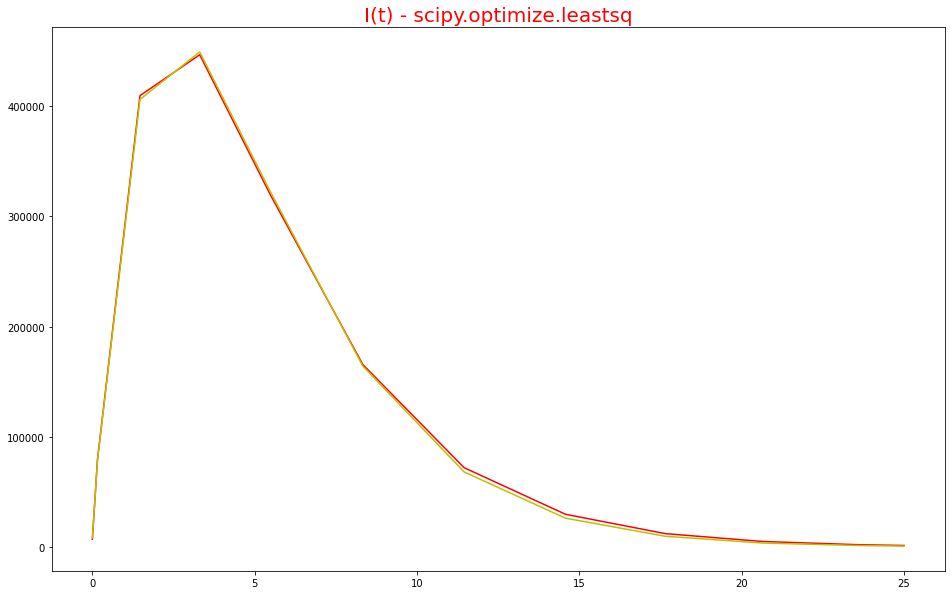

In [27]:
res3, res4 = solution_i.t, solution_i.y[0]

def i_exp(res3,S, I, A):
    return (I + A * S * res3) *(np.exp(-A*res3))

def i_diff (p0,res3,res4):
    S, I, A = p0
    return res4 - i_exp(res3, S, I, A)

p0 = (S_0, I_0, a)
sol_I, _ = leastsq(i_diff, p0, args=(res3, res4))

a_I = sol_I[0]
plt.plot(res3, res4, 'r')
plt.plot(res3, i_exp(res3, sol_I[0], sol_I[1], sol_I[2]), 'y')
plt.title('I(t) - scipy.optimize.leastsq', fontsize=20, color='r')

plt.show()

In [32]:
Rt = N - function_s(res, aprx_s[0], aprx_s[1]) - i_exp(res, sol_I[0], sol_I[1], sol_I[2])
R_interp = interp1d(solution_s.t, Rt, kind='linear')

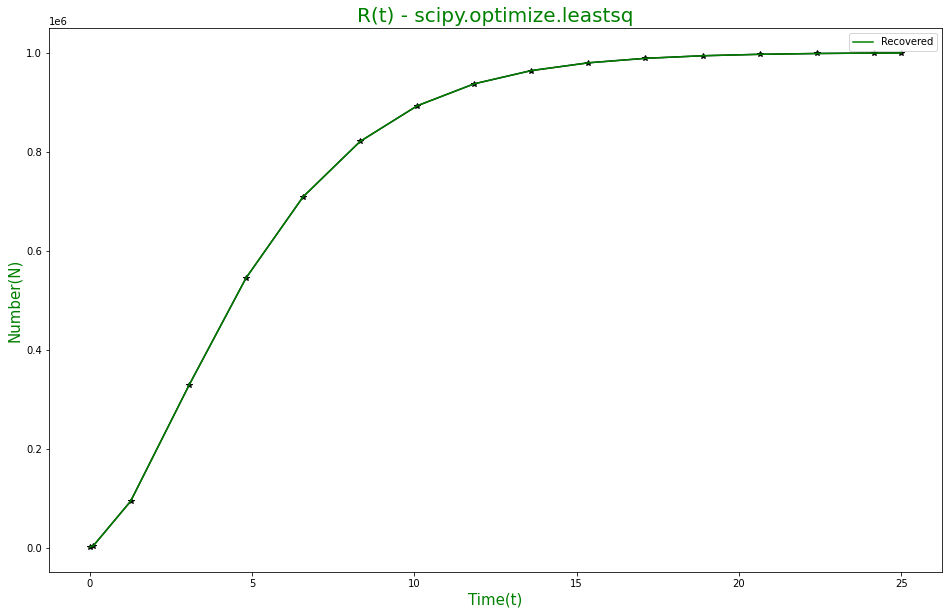

In [34]:
plt.plot(solution_s.t, Rt, 'k-*')
plt.plot(solution_s.t, R_interp(solution_s.t), color='g', label='Recovered')

plt.title('R(t) - scipy.optimize.leastsq', fontsize=20, color='g')
plt.xlabel('Time(t)', fontsize=15, color="g") 
plt.ylabel('Number(N)', fontsize=15, color="g") 
plt.legend()
plt.show()

In [35]:
time = np.linspace(0, 25, 1500)
def St(time):
    return aprx_s[0] * np.exp(-aprx_s[1] * time)

def It(time):
    return (sol_I[1] + sol_I[0] * sol_I[2] * time) * np.exp((-1) * sol_I[2] * time)

def Rt(time):
    return N - St(time) - It(time)

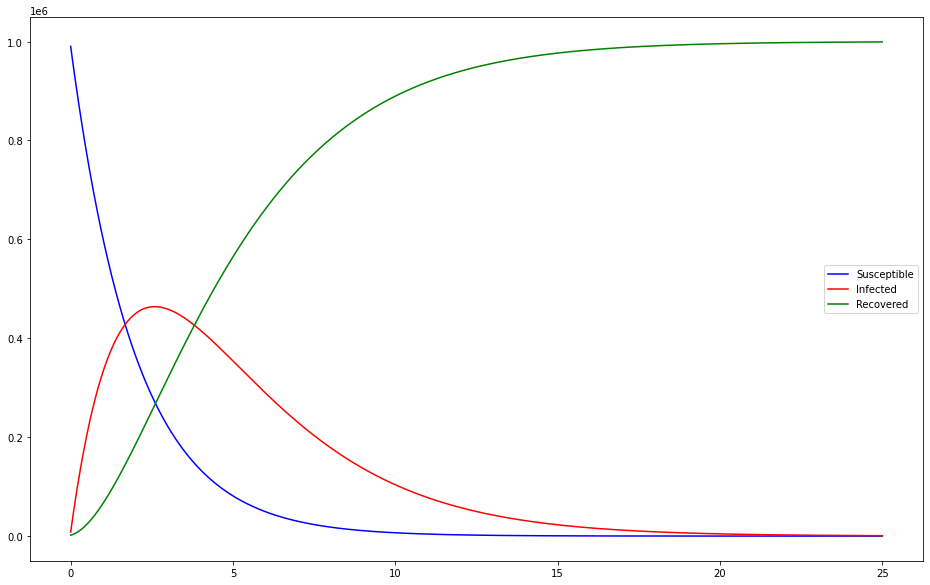

In [36]:
plt.plot(time, St(time), color='blue', label='Susceptible')

plt.plot(time, It(time), color='red', label='Infected')

plt.plot(time, Rt(time), color='green', label='Recovered')

plt.legend()
plt.show()

In [37]:
result_min = minimize_scalar(lambda x: -i_exp(x, sol_I[0], sol_I[1], sol_I[2]), bounds=(0, 5))
result_min

 message: Solution found.
 success: True
  status: 0
     fun: -463867.96723089827
       x: 2.5889582049252287
     nit: 11
    nfev: 11